In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
data['Sales'].value_counts().head()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
Name: Sales, dtype: int64

# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

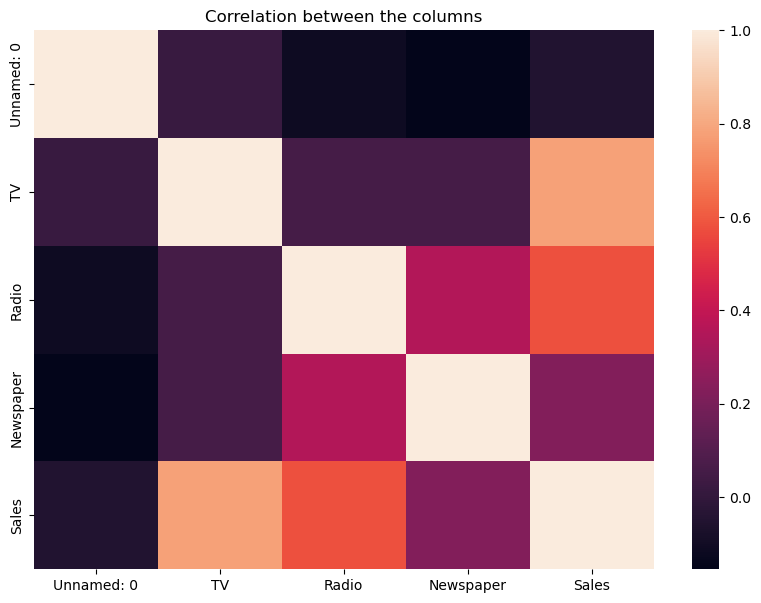

In [10]:
plt.figure(figsize=(10,7))
sb.heatmap(data.corr())
plt.title('Correlation between the columns')
plt.show()

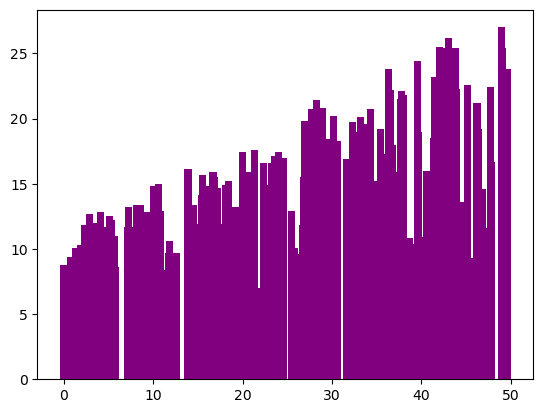

In [11]:
plt.bar(data['Radio'],data['Sales'],color='purple')
plt.show()

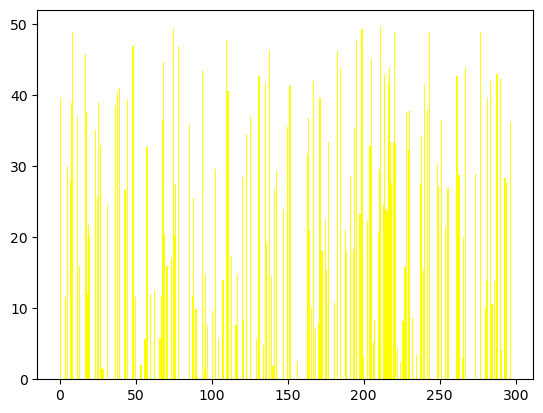

In [12]:
plt.bar(data['TV'],data['Radio'],color='yellow')
plt.show()

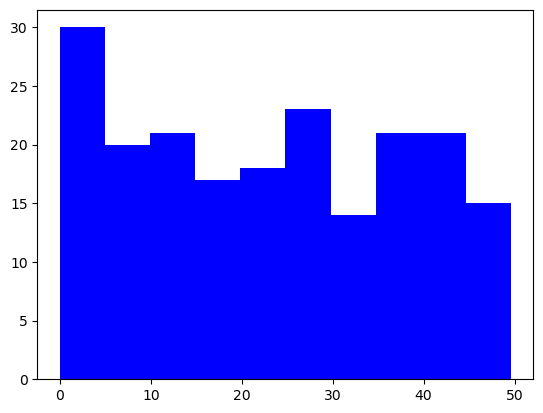

In [13]:
plt.hist(data['Radio'],color="blue")
plt.show()

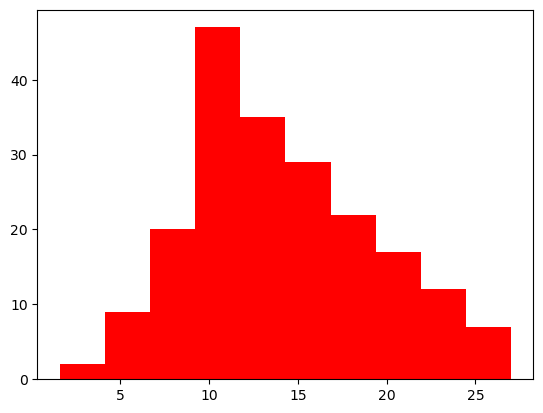

In [14]:
plt.hist(data['Sales'],color="red")
plt.show()

In [15]:
x=data.drop("Sales",axis=1)
y=data['Sales']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [18]:
x_train.shape

(150, 4)

In [19]:
from sklearn.linear_model  import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [21]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [22]:
p1=lin.predict(x_test)
print("Score is:",lin.score(x_test,y_test))
print("MAE:",mean_absolute_error(p1,y_test))
print("R2 Score:",r2_score(p1,y_test))
print("MSE:",mean_squared_error(p1,y_test))

Score is: 0.8731773864430443
MAE: 1.445407440809234
R2 Score: 0.865221347826425
MSE: 3.392961474057369


In [23]:
de=DecisionTreeRegressor()
de.fit(x_train,y_train)

DecisionTreeRegressor()

In [24]:
p2=de.predict(x_test)
print("MAE:",mean_absolute_error(p2,y_test))
print("R2 Score:",r2_score(p2,y_test))
print("MSE:",mean_squared_error(p2,y_test))
print("Score is:",de.score(x_test,y_test))

MAE: 0.764
R2 Score: 0.959148832199216
MSE: 1.0540000000000003
Score is: 0.9606034328090425


In [25]:
sv=SVR()
sv.fit(x_train,y_train)

SVR()

In [26]:
p3=sv.predict(x_test)
print("MAE:",mean_absolute_error(p3,y_test))
print("R2 Score:",r2_score(p3,y_test))
print("MSE:",mean_squared_error(p3,y_test))
print("Score is:",sv.score(x_test,y_test))

MAE: 1.8709207642379235
R2 Score: 0.5010418577002003
MSE: 6.1682448235042715
Score is: 0.7694424367747043


In [27]:
rn=RandomForestRegressor(n_estimators=30)
rn.fit(x_train,y_train)

RandomForestRegressor(n_estimators=30)

In [28]:
p4=rn.predict(x_test)
print("MAE:",mean_absolute_error(p4,y_test))
print("R2 Score:",r2_score(p4,y_test))
print("MSE:",mean_squared_error(p4,y_test))
print("Score is:",rn.score(x_test,y_test))

MAE: 0.5965333333333329
R2 Score: 0.9730184804119155
MSE: 0.6031631111111105
Score is: 0.9774548804231539


In [29]:
ada=AdaBoostRegressor(n_estimators=30)
ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=30)

In [30]:
p5=ada.predict(x_test)
print("MAE:",mean_absolute_error(p5,y_test))
print("R2 Score:",r2_score(p5,y_test))
print("MSE:",mean_squared_error(p5,y_test))
print("Score is:",ada.score(x_test,y_test))

MAE: 0.8162882594461852
R2 Score: 0.9523038897538982
MSE: 1.0100313416966575
Score is: 0.96224689979305
